**The tutorial for healpy**

@ Data: 2025-03-30<br>
@ Author: Rui Zhu<br>
@ Follow: <br>
1. https://healpy.readthedocs.io/en/latest/tutorial.html
2. https://astropy-healpix.readthedocs.io/en/latest/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

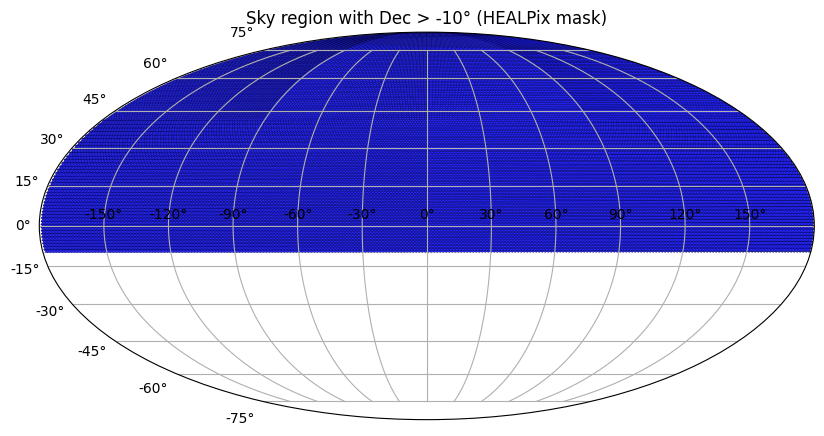

In [4]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# 设置 HEALPix 分辨率
nside = 64
npix = hp.nside2npix(nside)

# 获取所有像素中心
theta, phi = hp.pix2ang(nside, np.arange(npix))
dec = np.degrees(0.5 * np.pi - theta)

# 筛选 Dec > -10°
mask = dec > -10
selected_pix = np.where(mask)[0]

# 创建 figure
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='mollweide')

# 绘制每个像素的边界（球面投影坐标）
for pix in selected_pix:
    vertices = hp.boundaries(nside, pix, step=1)  # shape (2, N)
    lon = np.degrees(np.arctan2(vertices[1], vertices[0]))
    lat = np.degrees(np.arcsin(vertices[2]))

    # 转换成 RA, Dec 样式
    ra = lon
    dec_v = lat

    # Mollweide expects longitude in radians [-pi, pi]
    ra_rad = np.radians(np.mod(ra + 360, 360))  # [0, 360]
    ra_rad[ra_rad > np.pi] -= 2 * np.pi  # wrap to [-180°, 180°]
    dec_rad = np.radians(dec_v)

    ax.fill(ra_rad, dec_rad, color='blue', alpha=0.6, edgecolor='black', linewidth=0.2)

ax.set_title("Sky region with Dec > -10° (HEALPix mask)", fontsize=12)
ax.grid(True)

plt.show()
